In [1]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 总体大纲 什么因素影响了销售额的变化（性别，地区，品牌种类，回购人数，购买总人数，在不同年之间的对比）

In [2]:
# 查看数据
data_count=pd.read_csv('./食品销售数据集-销售明细表.csv')

data_store=pd.read_csv('./食品销售数据集-门店表.csv')

data_user=pd.read_csv('./食品销售数据集-会员表.csv')

data_objct=pd.read_csv('./食品销售数据集-产品表.csv')

In [3]:
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 用来显示中文
plt.rcParams["axes.unicode_minus"] = False  # 用来显示负号

# 对数据的展示

In [4]:
data_count.head()

,date,order_id,store_id,user_id,pro_id,quantity,amount
0,5/4/2019 00:00:00,od_000001,SC013,cus_00001,pro_0001,2,576.00
1,10/8/2019 00:00:00,od_000002,HAIN007,cus_00002,pro_0002,1,29.50
2,7/6/2019 00:00:00,od_000003,JS007,cus_00003,pro_0003,1,2.49
3,12/12/2019 00:00:00,od_000004,HLJ005,cus_00004,pro_0004,4,1184.00
4,22/9/2019 00:00:00,od_000005,SD005,cus_00005,pro_0005,1,0.00


In [5]:
data_count.head()

,date,order_id,store_id,user_id,pro_id,quantity,amount
0,5/4/2019 00:00:00,od_000001,SC013,cus_00001,pro_0001,2,576.00
1,10/8/2019 00:00:00,od_000002,HAIN007,cus_00002,pro_0002,1,29.50
2,7/6/2019 00:00:00,od_000003,JS007,cus_00003,pro_0003,1,2.49
3,12/12/2019 00:00:00,od_000004,HLJ005,cus_00004,pro_0004,4,1184.00
4,22/9/2019 00:00:00,od_000005,SD005,cus_00005,pro_0005,1,0.00


In [6]:
data_user.head()

,id,gender,age,Month_age,birth
0,cus_00001,女,30,2-3Y,25/11/2018 00:00:00
1,cus_00002,女,41,3-4Y,1/1/2018 00:00:00
2,cus_00003,男,37,3-4Y,1/5/2018 00:00:00
3,cus_00004,女,38,3-4Y,1/4/2018 00:00:00
4,cus_00005,男,28,2-3Y,25/1/2019 00:00:00


In [7]:
data_store.head()

,id,store_name,area,province,city,province_code,city_code
0,AH001,安徽1号店,华东,安徽省,合肥市,340000,340100.0
1,AH002,安徽2号店,华东,安徽省,芜湖市,340000,340200.0
2,AH003,安徽3号店,华东,安徽省,阜阳市,340000,341200.0
3,AH004,安徽4号店,华东,安徽省,宿州市,340000,341300.0
4,AH005,安徽5号店,华东,安徽省,安庆市,340000,340800.0


In [8]:
data_objct.head()

,id,pro_name,category,sub_category,brand
0,pro_0001,TGFDE儿童型益生菌粉2g*48袋,益生菌,综合益生菌,合生元
1,pro_0002,有机猪肝蔬菜营养面200g,米粉_面条_粥,面条,方广
2,pro_0003,益生菌酸奶溶豆(蓝莓味)18g,溶豆_泡芙_米饼,溶豆,禾泱泱
3,pro_0004,TGFDE益生菌冲剂儿童型1.5g*48袋,益生菌,综合益生菌,合生元
4,pro_0005,特福芬175g有机大米粉,米粉_面条_粥,米粉,特福芬


In [9]:
# 修改日期时间的数据类型，方便后期分析
data_count['date']=pd.to_datetime(data_count['date'])
#data['订单付款时间']=pd.to_datetime(data['订单付款时间'])
# 修改日期时间的数据类型，方便后期分析
data_user['birth']=pd.to_datetime(data_user['birth'])

In [10]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97156 entries, 0 to 97155
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         97156 non-null  object        
 1   gender     97156 non-null  object        
 2   age        97156 non-null  int64         
 3   Month_age  97156 non-null  object        
 4   birth      97156 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 3.7+ MB


In [11]:
# 如果你想要查看合并后的结果

# 预处理

In [13]:

# 合并时为重复的列名添加后缀
merged_data_new = pd.merge(data_count, data_store, how='inner', left_on='store_id', right_on='id', suffixes=('_merged_data_new', '_data_store'))
merged_data_new2 = pd.merge(merged_data_new, data_user, how='inner', left_on='user_id', right_on='id', suffixes=('_merged_data_new2', '_data_user'))
merged_data_list = pd.merge(merged_data_new2, data_objct, how='inner', left_on='pro_id', right_on='id', suffixes=('_merged_data_list', '_data_objct'))
# 选择性地保留其中一个相同的列，例如，保留来自 merged_data_new2 的列
merged_data_new4 = merged_data_list[['user_id','date','area','province','city','category','sub_category','brand','gender','age','amount','quantity']]

# 输出处理后的 DataFrame
print(merged_data_new4)

           user_id       date area province city  category sub_category brand  \
0        cus_00001 2019-05-04   西南      四川省  达州市       益生菌        综合益生菌   合生元   
1        cus_00076 2019-07-10   西南      四川省  达州市       益生菌        综合益生菌   合生元   
2        cus_00391 2020-04-04   西南      四川省  达州市       益生菌        综合益生菌   合生元   
3        cus_00880 2019-03-18   西南      四川省  达州市       益生菌        综合益生菌   合生元   
4        cus_00880 2019-03-18   西南      四川省  达州市       益生菌        综合益生菌   合生元   
...            ...        ...  ...      ...  ...       ...          ...   ...   
1003867  cus_24206 2019-03-17   华南      海南省  东方市   米粉_面条_粥           米粉    贝兜   
1003868  cus_13156 2021-05-29   华东      江西省  吉安市     酸奶_奶酪           酸奶   伴宝乐   
1003869  cus_20546 2021-02-01   华东      浙江省  杭州市     营养补充剂          牛初乳  生命阳光   
1003870  cus_88058 2019-08-07   华东      浙江省  杭州市  溶豆_泡芙_米饼           溶豆   稻田村   
1003871  cus_81321 2021-05-25   华北      河北省  沧州市   米粉_面条_粥           面条    樱印   

        gender  age   amoun

In [14]:

# 合并时为重复的列名添加后缀
merged_data_new = pd.merge(data_count, data_store, how='inner', left_on='store_id', right_on='id', suffixes=('_merged_data_new', '_data_store'))
merged_data_new2 = pd.merge(merged_data_new, data_user, how='inner', left_on='user_id', right_on='id', suffixes=('_merged_data_new2', '_data_user'))
merged_data_list = pd.merge(merged_data_new2, data_objct, how='inner', left_on='pro_id', right_on='id', suffixes=('_merged_data_list', '_data_objct'))
# 选择性地保留其中一个相同的列，例如，保留来自 merged_data_new2 的列
merged_data_new3 = merged_data_list[['date','area','province','city','category','sub_category','brand','gender','age','amount','quantity']]

# 输出处理后的 DataFrame
print(merged_data_new3)


              date area province city  category sub_category brand gender  \
0       2019-05-04   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
1       2019-07-10   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
2       2020-04-04   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
3       2019-03-18   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
4       2019-03-18   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
...            ...  ...      ...  ...       ...          ...   ...    ...   
1003867 2019-03-17   华南      海南省  东方市   米粉_面条_粥           米粉    贝兜      女   
1003868 2021-05-29   华东      江西省  吉安市     酸奶_奶酪           酸奶   伴宝乐      男   
1003869 2021-02-01   华东      浙江省  杭州市     营养补充剂          牛初乳  生命阳光      男   
1003870 2019-08-07   华东      浙江省  杭州市  溶豆_泡芙_米饼           溶豆   稻田村      男   
1003871 2021-05-25   华北      河北省  沧州市   米粉_面条_粥           面条    樱印      女   

         age   amount  quantity  
0         30   576.00         2  
1      

# 初步看年龄和总金额之的关系

In [15]:
# 转换为 DataFrame
df = pd.DataFrame(merged_data_new3)

# 计算相关系数
correlation_coefficient = df['gender'].astype('category').cat.codes.corr(df['amount'])

# 打印结果
print(f"相关系数: {correlation_coefficient}")


相关系数: 0.001477643641828115


In [16]:

# 转换为 DataFrame
df2 = pd.DataFrame(merged_data_new3)

# 计算年龄和总金额之间的相关系数
correlation_coefficient = df2['age'].corr(df2['amount'])

# 打印结果
print(f"年龄和总金额之间的相关系数: {correlation_coefficient}")


年龄和总金额之间的相关系数: -0.00010950642303767916


In [17]:
# 删除包含缺失值的行
merged_data_new3 = merged_data_new3.dropna(subset=['amount'])

# 输出处理后的 DataFrame
print(merged_data_new3)


              date area province city  category sub_category brand gender  \
0       2019-05-04   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
1       2019-07-10   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
2       2020-04-04   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
3       2019-03-18   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
4       2019-03-18   西南      四川省  达州市       益生菌        综合益生菌   合生元      女   
...            ...  ...      ...  ...       ...          ...   ...    ...   
1003867 2019-03-17   华南      海南省  东方市   米粉_面条_粥           米粉    贝兜      女   
1003868 2021-05-29   华东      江西省  吉安市     酸奶_奶酪           酸奶   伴宝乐      男   
1003869 2021-02-01   华东      浙江省  杭州市     营养补充剂          牛初乳  生命阳光      男   
1003870 2019-08-07   华东      浙江省  杭州市  溶豆_泡芙_米饼           溶豆   稻田村      男   
1003871 2021-05-25   华北      河北省  沧州市   米粉_面条_粥           面条    樱印      女   

         age   amount  quantity  
0         30   576.00         2  
1      

In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# 假设你的数据是merged_data_new3
data_for_analysis = merged_data_new3[['gender', 'province']]

# 创建一个列联表
contingency_table = pd.crosstab(data_for_analysis['gender'], data_for_analysis['province'])

# 进行卡方检验
chi2, p, _, _ = chi2_contingency(contingency_table)

print("卡方值:", chi2)
print("P值:", p)


卡方值: 280.3009453576534
P值: 5.247148475615029e-45


# 热力图的展示

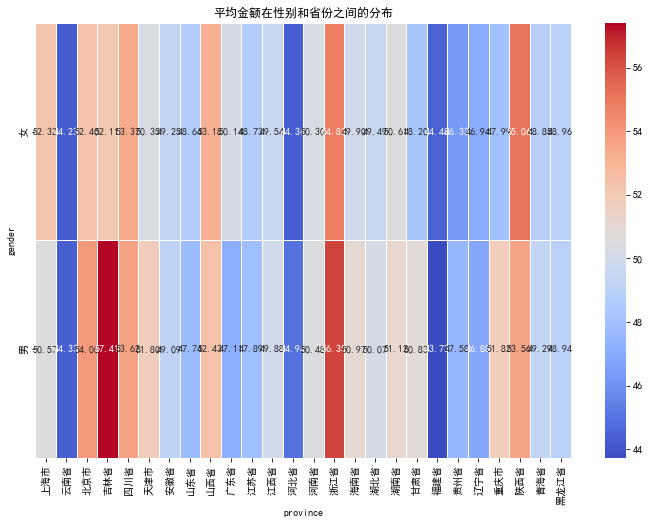

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 创建透视表
pivot_table = pd.pivot_table(merged_data_new3, values='amount', index='gender', columns='province', aggfunc='mean')

# 使用热力图可视化透视表
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('平均金额在性别和省份之间的分布')
plt.show()


In [20]:

# 分别选择 2021、2020、2019 年的数据
merged_data_new3_2021 = merged_data_new3[merged_data_new3['date'].dt.year == 2021]
merged_data_new3_2020 = merged_data_new3[merged_data_new3['date'].dt.year == 2020]
merged_data_new3_2019 = merged_data_new3[merged_data_new3['date'].dt.year == 2019]

# 输出分开的 DataFrame
print("2021年的数据:")
print(merged_data_new3_2021)

print("\n2020年的数据:")
print(merged_data_new3_2020)

print("\n2019年的数据:")
print(merged_data_new3_2019)


2021年的数据:
              date area province city category sub_category brand gender  age  \
20      2021-07-03   西南      四川省  达州市      益生菌        综合益生菌   合生元      女   15   
21      2021-04-30   西南      四川省  达州市      益生菌        综合益生菌   合生元      女   72   
22      2021-04-30   西南      四川省  达州市      益生菌        综合益生菌   合生元      女   72   
27      2021-01-05   西南      四川省  达州市      益生菌        综合益生菌   合生元      女   28   
28      2021-10-04   西南      四川省  达州市      益生菌        综合益生菌   合生元      男   13   
...            ...  ...      ...  ...      ...          ...   ...    ...  ...   
1003861 2021-05-31   西南      四川省  达州市  米粉_面条_粥           面条    伊威      男    5   
1003864 2021-04-21   华东      山东省  济宁市  米粉_面条_粥           米粉    英氏      男   12   
1003868 2021-05-29   华东      江西省  吉安市    酸奶_奶酪           酸奶   伴宝乐      男   28   
1003869 2021-02-01   华东      浙江省  杭州市    营养补充剂          牛初乳  生命阳光      男   30   
1003871 2021-05-25   华北      河北省  沧州市  米粉_面条_粥           面条    樱印      女   52   

          amount 

In [21]:
data_2021_category = merged_data_new3_2021.groupby('category')['amount'].sum().reset_index()
data_2020_category = merged_data_new3_2020.groupby('category')['amount'].sum().reset_index()
data_2019_category = merged_data_new3_2019.groupby('category')['amount'].sum().reset_index()
# 如果你想要查看合并后的结果
print("2021")
print(data_2021_category)
print("\n2020")
print(data_2020_category)
print("\n2019")
print(data_2019_category)


2021
    category      amount
0        DHA   690051.73
1       休闲零食   170617.27
2         泥类   571955.50
3       清火开胃    25882.42
4   溶豆_泡芙_米饼  1061428.39
5       烹饪食材    33148.91
6        益生菌  1754392.38
7    米粉_面条_粥  1049792.40
8        维生素   184447.76
9    肉_菜_水果松   440796.49
10     营养素软糖   149996.85
11     营养补充剂   190619.95
12     酸奶_奶酪   161309.19
13         钙   249921.68
14        饮料   205180.41
15        饼干   550208.13

2020
    category      amount
0        DHA  2300071.76
1       休闲零食   413725.63
2         泥类  1203820.22
3       清火开胃    67300.90
4   溶豆_泡芙_米饼  2817266.88
5       烹饪食材    53277.11
6        益生菌  5438018.67
7    米粉_面条_粥  4000354.60
8        维生素   820213.08
9    肉_菜_水果松  1379598.61
10     营养素软糖   219108.96
11     营养补充剂   340929.53
12     酸奶_奶酪   214713.70
13         钙   668444.50
14        饮料   499704.96
15        饼干  1323431.74

2019
    category      amount
0        DHA  1291245.81
1       休闲零食   305270.79
2         泥类   819752.07
3       清火开胃    73546.58
4   溶豆_泡

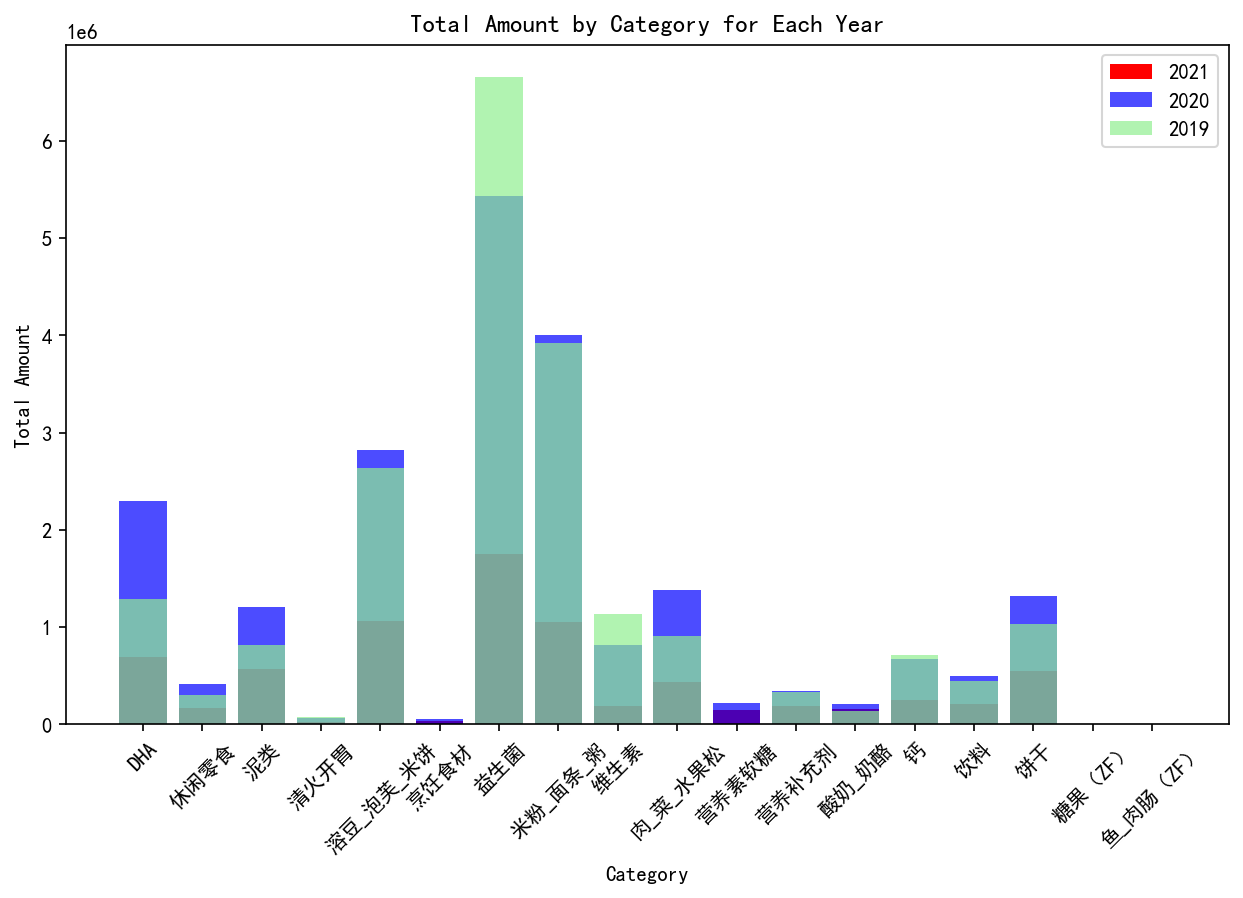

In [22]:
import matplotlib.pyplot as plt

# 转换为 DataFrame
df_2021 = pd.DataFrame(data_2021_category)
df_2020 = pd.DataFrame(data_2020_category)
df_2019 = pd.DataFrame(data_2019_category)

# 绘制柱状图
plt.figure(figsize=(10, 6), dpi=150)

plt.bar(df_2021['category'], df_2021['amount'], label='2021', color='red')
plt.bar(df_2020['category'], df_2020['amount'], label='2020', alpha=0.7, color='blue')
plt.bar(df_2019['category'], df_2019['amount'], label='2019', alpha=0.7, color='lightgreen')

plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.title('Total Amount by Category for Each Year')
plt.legend()

# 调整 x 轴刻度标签的角度
plt.xticks(rotation=45)

plt.show()


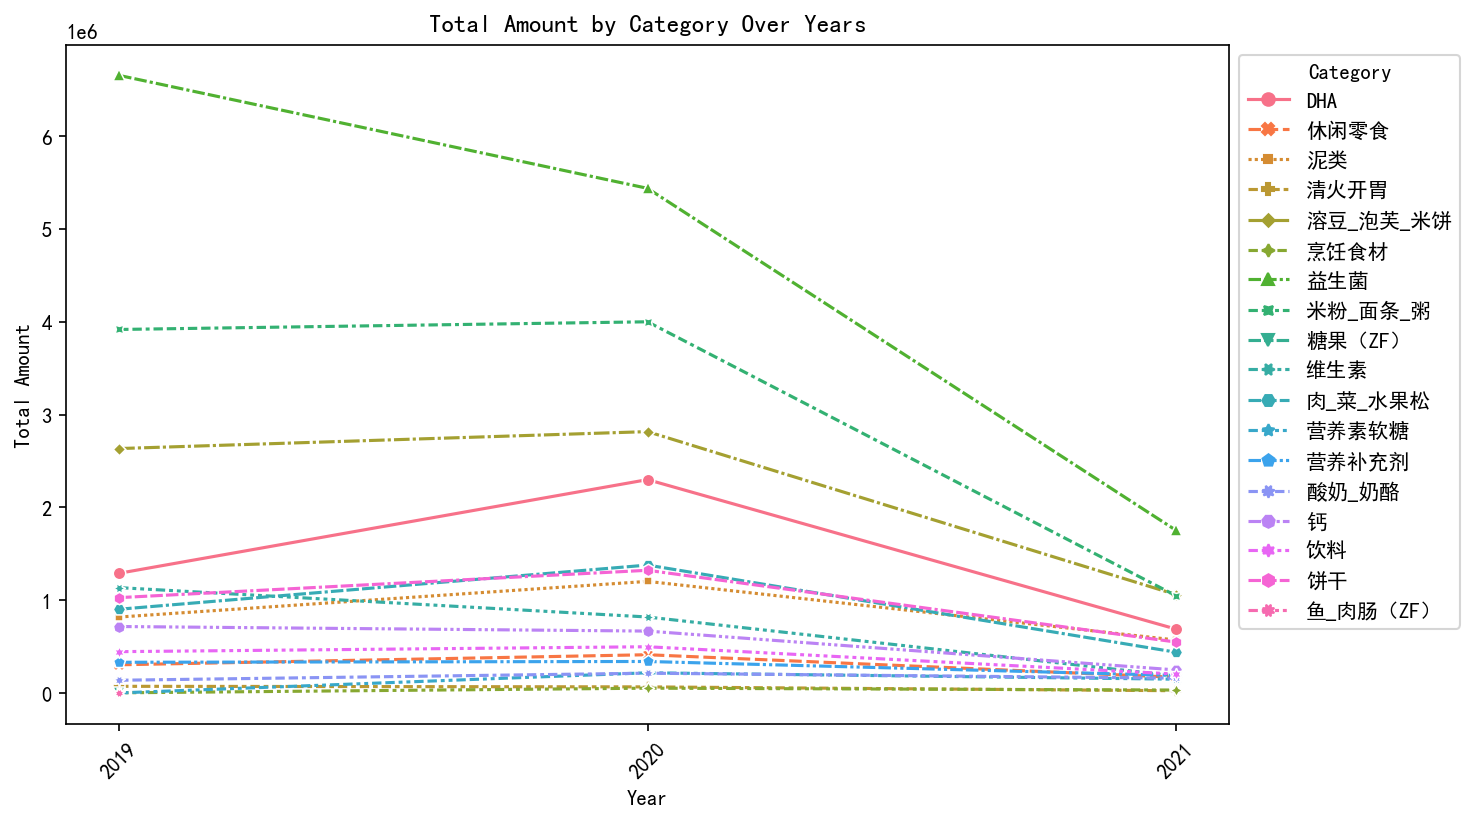

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 假设有 data_2019_category, data_2020_category, data_2021_category 这三个数据框
# 先给每个数据框添加一个表示年份的列
data_2019_category['Year'] = '2019'
data_2020_category['Year'] = '2020'
data_2021_category['Year'] = '2021'

# 合并数据
merged_data_category = pd.concat([data_2019_category, data_2020_category, data_2021_category], ignore_index=True)

# 使用 seaborn 绘制折线图
plt.figure(figsize=(10, 6), dpi=150)
sns.lineplot(x='Year', y='amount', hue='category', style='category', markers=True, data=merged_data_category)

plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Total Amount by Category Over Years')
plt.legend(title='Category', bbox_to_anchor=(1, 1))

# 调整 y 轴刻度标签的角度
plt.xticks(rotation=45)

plt.show()

In [24]:
# 合并 2019 和 2020 年份的数据
merged_2019_2020 = pd.merge(data_2019_category, data_2020_category, on='category', how='outer', suffixes=('_2019', '_2020'))

# 找到在 21 年之外出现的大类
new_categories = merged_2019_2020[merged_2019_2020['category'].isin(data_2021_category['category'].unique()) == False]

# 输出新出现的大类
print(new_categories[['category', 'amount_2019', 'amount_2020']])
##找到除了21年以外出现的大类

    category  amount_2019  amount_2020
8     糖果（ZF）       199.11          NaN
17  鱼_肉肠（ZF）        48.00          NaN


In [25]:
# 假设 'date' 列包含日期信息，格式为 YYYY-MM-DD
# 将 'date' 列转换为 Pandas 的日期类型
merged_data_new4['date'] = pd.to_datetime(merged_data_new4['date'])

# 提取年份信息并创建 'year' 列
merged_data_new4['year'] = merged_data_new4['date'].dt.year

# 按年份和用户进行分组，并计算每个用户的总量
user_total_amount_by_year = merged_data_new4.groupby(['year', 'user_id'])['amount'].sum().reset_index()

# 输出结果
print(user_total_amount_by_year)

        year    user_id   amount
0       2019  cus_00001   679.73
1       2019  cus_00002   236.55
2       2019  cus_00003  1230.79
3       2019  cus_00004  1244.30
4       2019  cus_00005   492.90
...      ...        ...      ...
182275  2021  cus_97152    59.22
182276  2021  cus_97153    42.64
182277  2021  cus_97154   314.00
182278  2021  cus_97155    28.40
182279  2021  cus_97156   811.20

[182280 rows x 3 columns]


In [26]:
merged_data_new4['date'] = pd.to_datetime(merged_data_new4['date'])

# 提取年份信息并创建 'year' 列
merged_data_new4['year'] = merged_data_new4['date'].dt.year

# 统计每年有多少个用户
users_per_year = merged_data_new4.groupby('year')['user_id'].nunique().reset_index()

# 输出结果
print(users_per_year)


   year  user_id
0  2019    61386
1  2020    75695
2  2021    45199


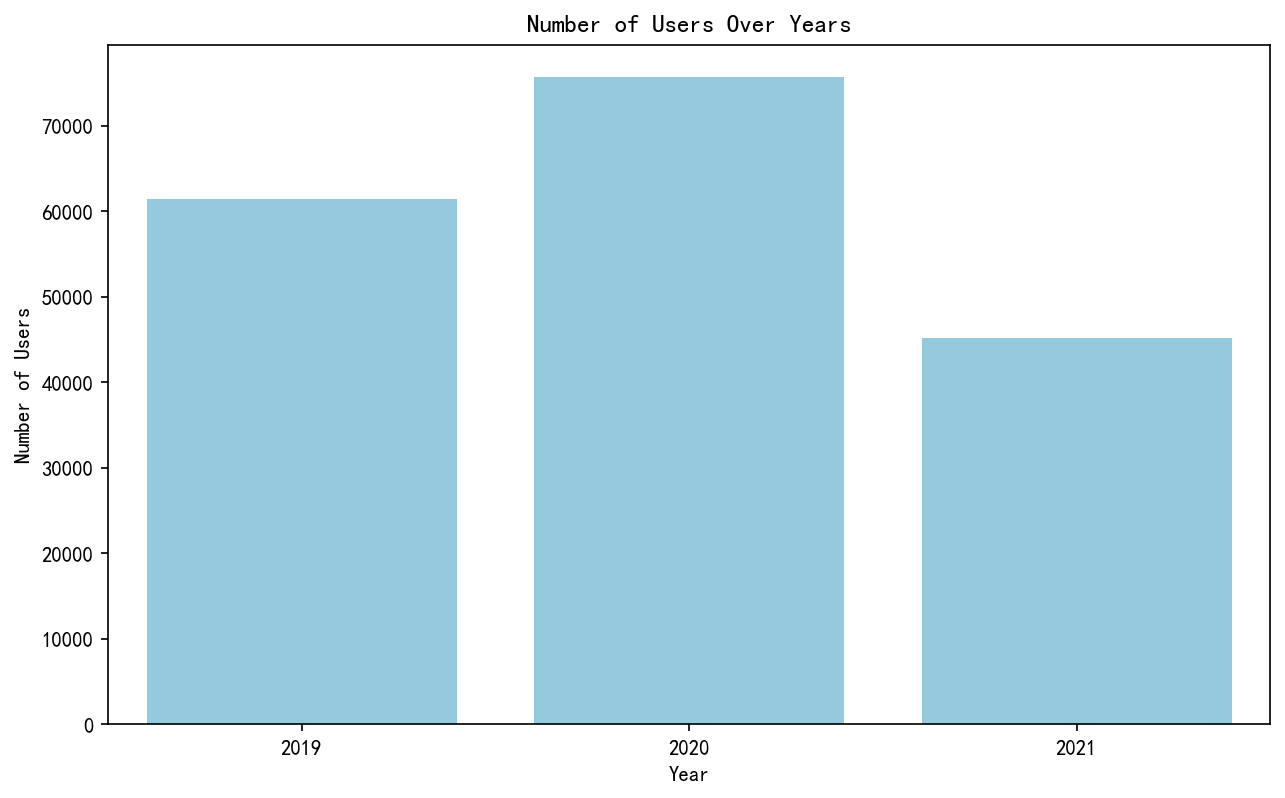

In [27]:



# 将 'date' 列转换为 Pandas 的日期类型
merged_data_new4['date'] = pd.to_datetime(merged_data_new4['date'])

# 提取年份信息并创建 'year' 列
merged_data_new4['year'] = merged_data_new4['date'].dt.year

# 统计每年有多少个用户
users_per_year = merged_data_new4.groupby('year')['user_id'].nunique().reset_index()

# 使用 seaborn 绘制柱状图
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(x='year', y='user_id', data=users_per_year, color='skyblue')

plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.title('Number of Users Over Years')

plt.show()


In [28]:
data_2021_brand = merged_data_new3_2021.groupby('brand')['amount'].sum().reset_index()
data_2020_brand = merged_data_new3_2020.groupby('brand')['amount'].sum().reset_index()
data_2019_brand = merged_data_new3_2019.groupby('brand')['amount'].sum().reset_index()
# 如果你想要查看合并后的结果
print("2021")
print(data_2021_brand)
print("\n2020")
print(data_2020_brand)
print("\n2019")
print(data_2019_brand)


2021
         brand    amount
0           AK    163.59
1        CHOKO  16156.76
2    CHOKO(进口)   6741.34
3    Dr.John's  16091.92
4         HiPP  36115.99
..         ...       ...
108        迪辅乐    955.27
109         采森    678.36
110        金必氏    251.34
111         龙牡   4944.95
112       龙牡福仔    196.62

[113 rows x 2 columns]

2020
         brand     amount
0          Aji    1211.34
1        CHOKO  102221.49
2    CHOKO(进口)   40878.64
3    Dr.John's   23706.45
4         HiPP    2455.40
..         ...        ...
114        趣食代    2448.26
115         达美     310.68
116         采森    4226.40
117        金必氏    1189.63
118         龙牡     993.00

[119 rows x 2 columns]

2019
         brand     amount
0          Aji    4470.83
1        CHOKO  231365.32
2    CHOKO(进口)  157063.79
3    Dr.John's     606.79
4     EDO PACK     238.41
..         ...        ...
131        金必氏     563.69
132         雀巢      25.90
133        韩美禾     206.30
134        香贡贡      41.80
135        麦欧欧     394.73

[136 rows 

In [29]:
# 找到21年的品牌集合
brands_2021 = set(data_2021_brand['brand'])

# 找到其他年份的品牌集合
brands_2019 = set(data_2019_brand['brand'])
brands_2020 = set(data_2020_brand['brand'])

# 找到除21年以外的品牌
brands_except_2021 = brands_2019.union(brands_2020) - brands_2021

# 输出结果
print("Brands except 2021:", brands_except_2021)


Brands except 2021: {'澳果源', 'NFC', '贺寿利', '娃哈哈', '深水湾', '麦欧欧', '汇源', '悠猴和他的朋友', '小捣蛋', '亦贝安', '儿歌', '捷客', '小狗汪汪队', '中为益优', '小猪佩奇', 'GOGO', '韩美禾', '朴珍', '美妙可', '森沫', '清净园', '艾乐洛咿', '贝爱其味', '味奇', '玛可欣', '心迪妈妈', '不二家', '佳乐定', '美林宝贝', '小公交车太友', '雀巢', '公司促销品', '百利佳', '美奇星', '美敦力', '贝因美', '欧诺佳宝', '婴派', 'GOGO SQUEEZ', '爱提力', '优臣', '迪吸', '萌咔', '旋旋乐', '果倍爽', '优美加', 'EDO PACK', '科尚童宝', '福乐蓓', '新慧欧', '欧贝果', '唯他可可', '不逗喵', '稻田村', '蛙稻米', '哈皮农场', '君乐宝', '海地村', '趣食代', '卡米达', '唯新', 'HAMU BEAR', '可儿芬', '香贡贡', '瑞氏麦', '澳臻', '启世', '尖叫', '优群', 'Aji', '哆瑞咪', '法乐比', '达美', 'Kiwigarden', '特福芬'}


In [30]:
# 统计品牌个数
num_brands_2021 = len(data_2021_brand)
num_brands_except_2021 = len(brands_except_2021)

# 计算除了21年以外的品牌的总额
total_amount_except_2021 = data_2019_brand[data_2019_brand['brand'].isin(brands_except_2021)]['amount'].sum() + \
                           data_2020_brand[data_2020_brand['brand'].isin(brands_except_2021)]['amount'].sum()

# 输出结果
print("Number of brands in 2021:", num_brands_2021)
print("Number of brands except 2021:", num_brands_except_2021)
print("Total amount of brands except 2021:", total_amount_except_2021)


Number of brands in 2021: 113
Number of brands except 2021: 75
Total amount of brands except 2021: 453893.33


In [31]:
import pandas as pd

# 转换为 DataFrame
df1 = pd.DataFrame(merged_data_new3_2019)
df2 = pd.DataFrame(merged_data_new3_2020)
df3 = pd.DataFrame(merged_data_new3_2021)

# 按照大类和中类分组，并计算总金额
grouped_data1 = df1.groupby(['category', 'sub_category','brand'])['amount'].sum().reset_index()
grouped_data2 = df2.groupby(['category', 'sub_category','brand'])['amount'].sum().reset_index()
grouped_data3 = df3.groupby(['category', 'sub_category','brand'])['amount'].sum().reset_index()
# 打印结果
print("2019")
print(grouped_data1)
print("\n2020")
print(grouped_data2)
print("\n2021")
print(grouped_data3)






2019
     category sub_category       brand     amount
0         DHA        动物DHA  KIDS SMART    1145.50
1         DHA        动物DHA      Swisse    1210.86
2         DHA        动物DHA         优你钙   50193.05
3         DHA        动物DHA          善存  232528.90
4         DHA        动物DHA         纽贝乐    2188.85
..        ...          ...         ...        ...
380        饼干           饼干          贝兜     173.61
381        饼干           饼干        贝爱其味      11.69
382        饼干           饼干         金必氏     563.69
383        饼干           饼干          雀巢      10.00
384  鱼_肉肠（ZF）       鱼肠（ZF）     悠猴和他的朋友      48.00

[385 rows x 4 columns]

2020
    category sub_category       brand     amount
0        DHA        动物DHA  KIDS SMART    2501.62
1        DHA        动物DHA      Swisse     461.00
2        DHA        动物DHA         优你钙   69760.96
3        DHA        动物DHA          善存   49976.44
4        DHA        动物DHA         爱奇氏    1158.68
..       ...          ...         ...        ...
382       饼干          

In [32]:
import pandas as pd

# 假设 merged_data_new3 是包含了大类、品牌等信息的 DataFrame
# 以及 'category' 和 'brand' 是数据中对应的列名

# 使用 groupby 和 count 统计相同大类中每个品牌的个数
brand_count = merged_data_new3.groupby(['category', 'brand']).size().reset_index(name='brand_count')

# 打印结果
print(brand_count)


     category        brand  brand_count
0         DHA   KIDS SMART           18
1         DHA    MAIDENLEE          402
2         DHA       Swisse           16
3         DHA  good health           48
4         DHA         乐佳善优         1199
..        ...          ...          ...
369        饼干         贝比玛玛         2163
370        饼干         贝爱其味            2
371        饼干          金必氏          909
372        饼干           雀巢            3
373  鱼_肉肠（ZF）      悠猴和他的朋友            1

[374 rows x 3 columns]


In [33]:
import pandas as pd


# 存储每年的结果
brand_counts = []

# 循环处理每一年的数据
for year, data in zip(['2019', '2020', '2021'], [merged_data_new3_2019, merged_data_new3_2020, merged_data_new3_2021]):
    # 使用 groupby 和 count 统计相同大类中每个品牌的个数
    brand_count = data.groupby(['category', 'brand']).size().reset_index(name='brand_count')
    # 添加年份列
    brand_count['year'] = year
    # 存储结果
    brand_counts.append(brand_count)

# 将三年的结果合并为一个 DataFrame
result = pd.concat(brand_counts, ignore_index=True)
for year, data in zip(['2019', '2020', '2021'], [merged_data_new3_2019, merged_data_new3_2020, merged_data_new3_2021]):
    # 使用 groupby 和 count 统计相同大类中每个品牌的个数
    brand_count = data.groupby(['category', 'brand']).size().reset_index(name='brand_count')
    # 添加年份列
    brand_count['year'] = year

    print(f"\n{year} Data:")
    print(brand_count)



2019 Data:
     category       brand  brand_count  year
0         DHA  KIDS SMART            4  2019
1         DHA   MAIDENLEE          152  2019
2         DHA      Swisse            9  2019
3         DHA        乐佳善优          511  2019
4         DHA         优你钙          275  2019
..        ...         ...          ...   ...
259        饼干        贝比玛玛         1336  2019
260        饼干        贝爱其味            2  2019
261        饼干         金必氏          302  2019
262        饼干          雀巢            3  2019
263  鱼_肉肠（ZF）     悠猴和他的朋友            1  2019

[264 rows x 4 columns]

2020 Data:
    category        brand  brand_count  year
0        DHA   KIDS SMART           14  2020
1        DHA    MAIDENLEE          196  2020
2        DHA       Swisse            7  2020
3        DHA  good health           36  2020
4        DHA         乐佳善优          501  2020
..       ...          ...          ...   ...
260       饼干          禾泱泱        17564  2020
261       饼干          童之味          180  2020
262    

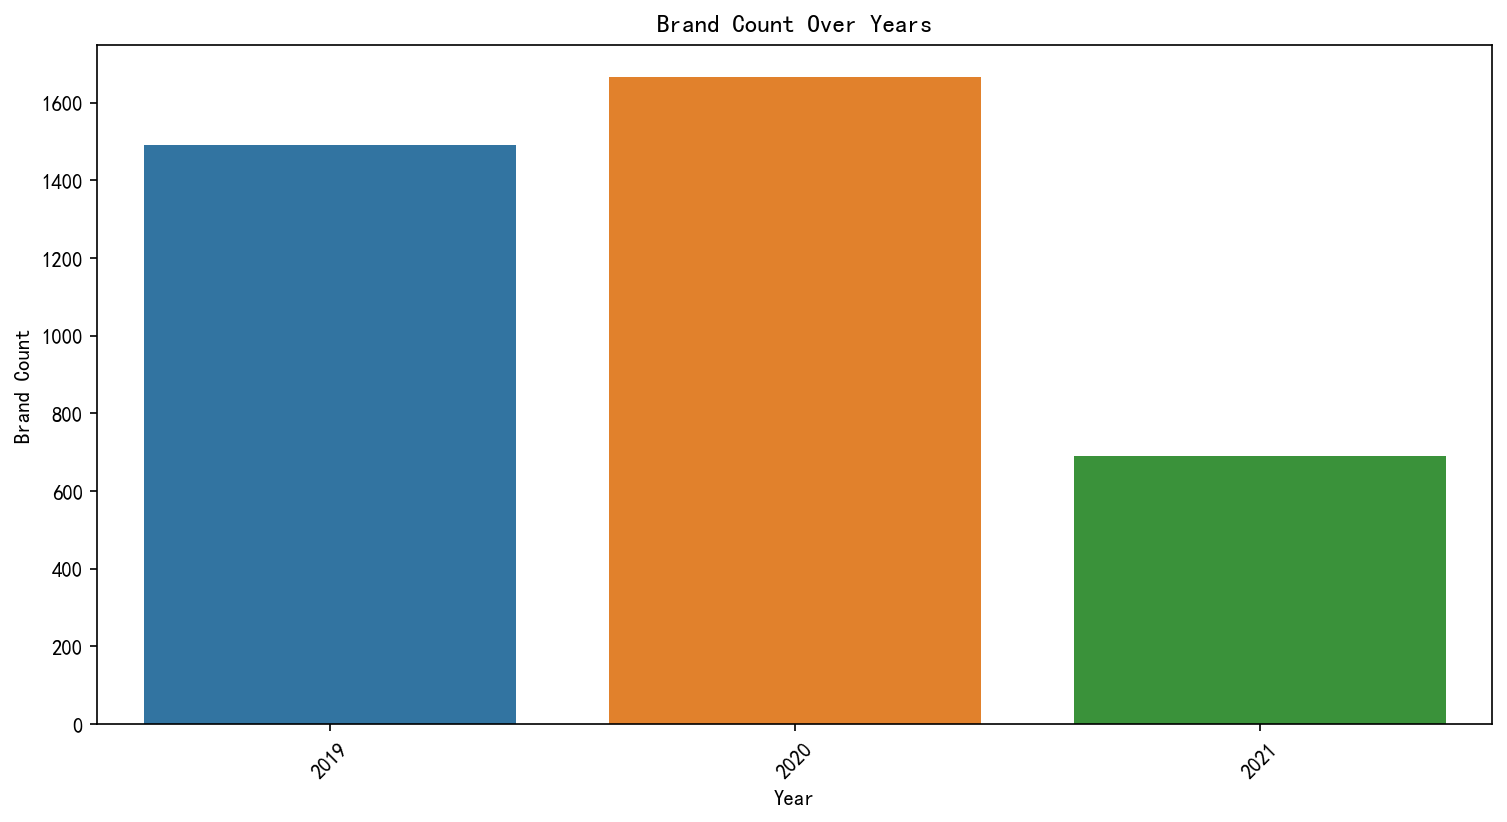

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 seaborn 绘制柱状图
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(x='year', y='brand_count', data=result, ci=None)

plt.xlabel('Year')
plt.ylabel('Brand Count')
plt.title('Brand Count Over Years')
plt.xticks(rotation=45)
plt.show()


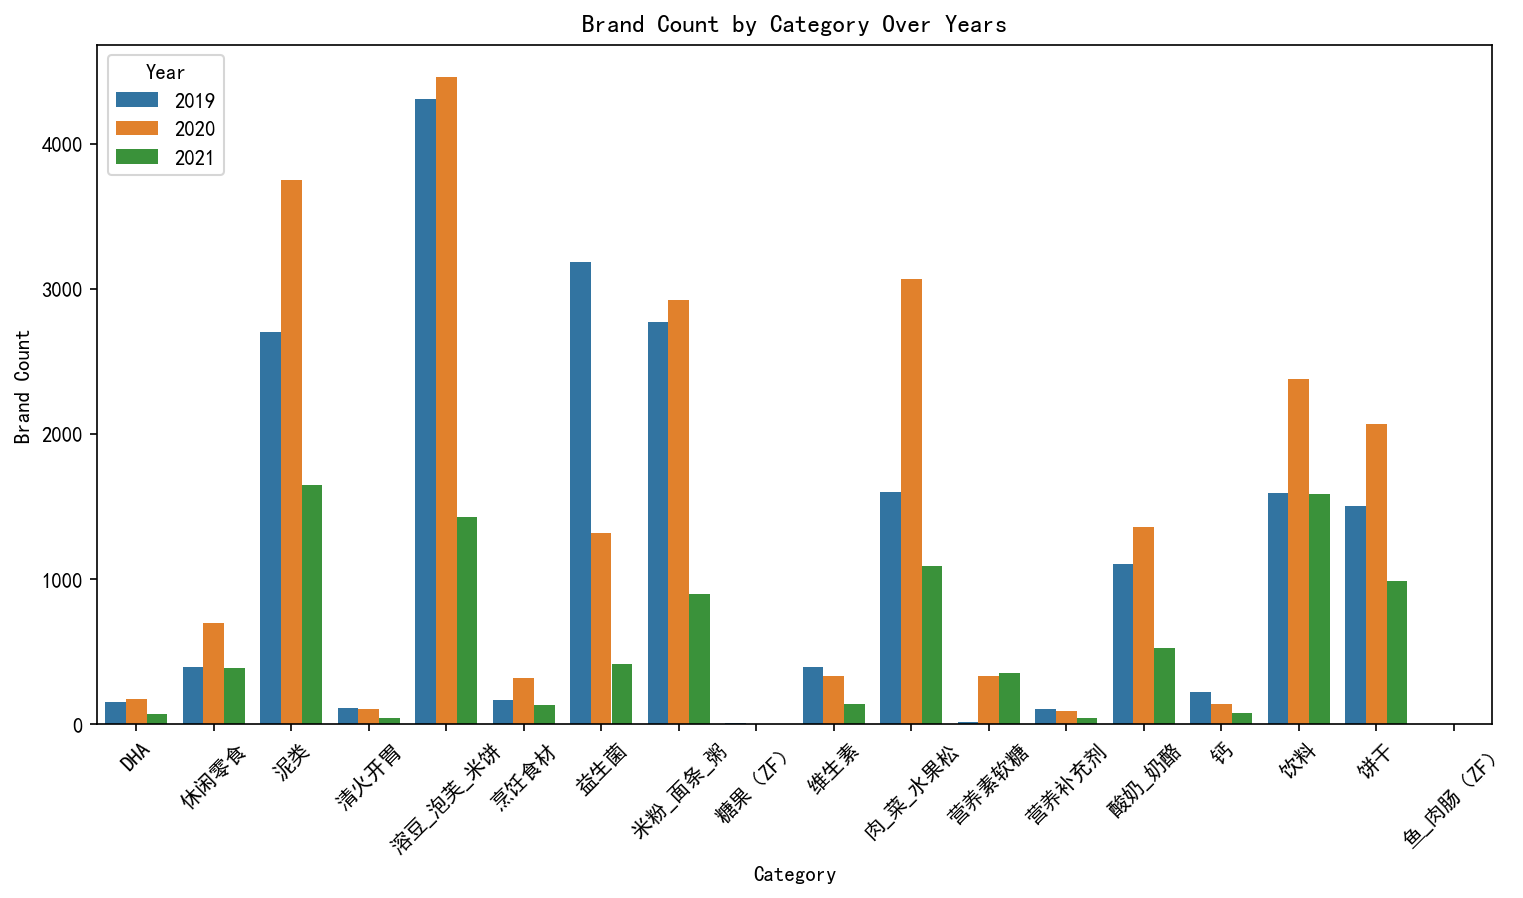

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 seaborn 绘制柱状图
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(x='category', y='brand_count', hue='year', data=result, ci=None)

plt.xlabel('Category')
plt.ylabel('Brand Count')
plt.title('Brand Count by Category Over Years')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()


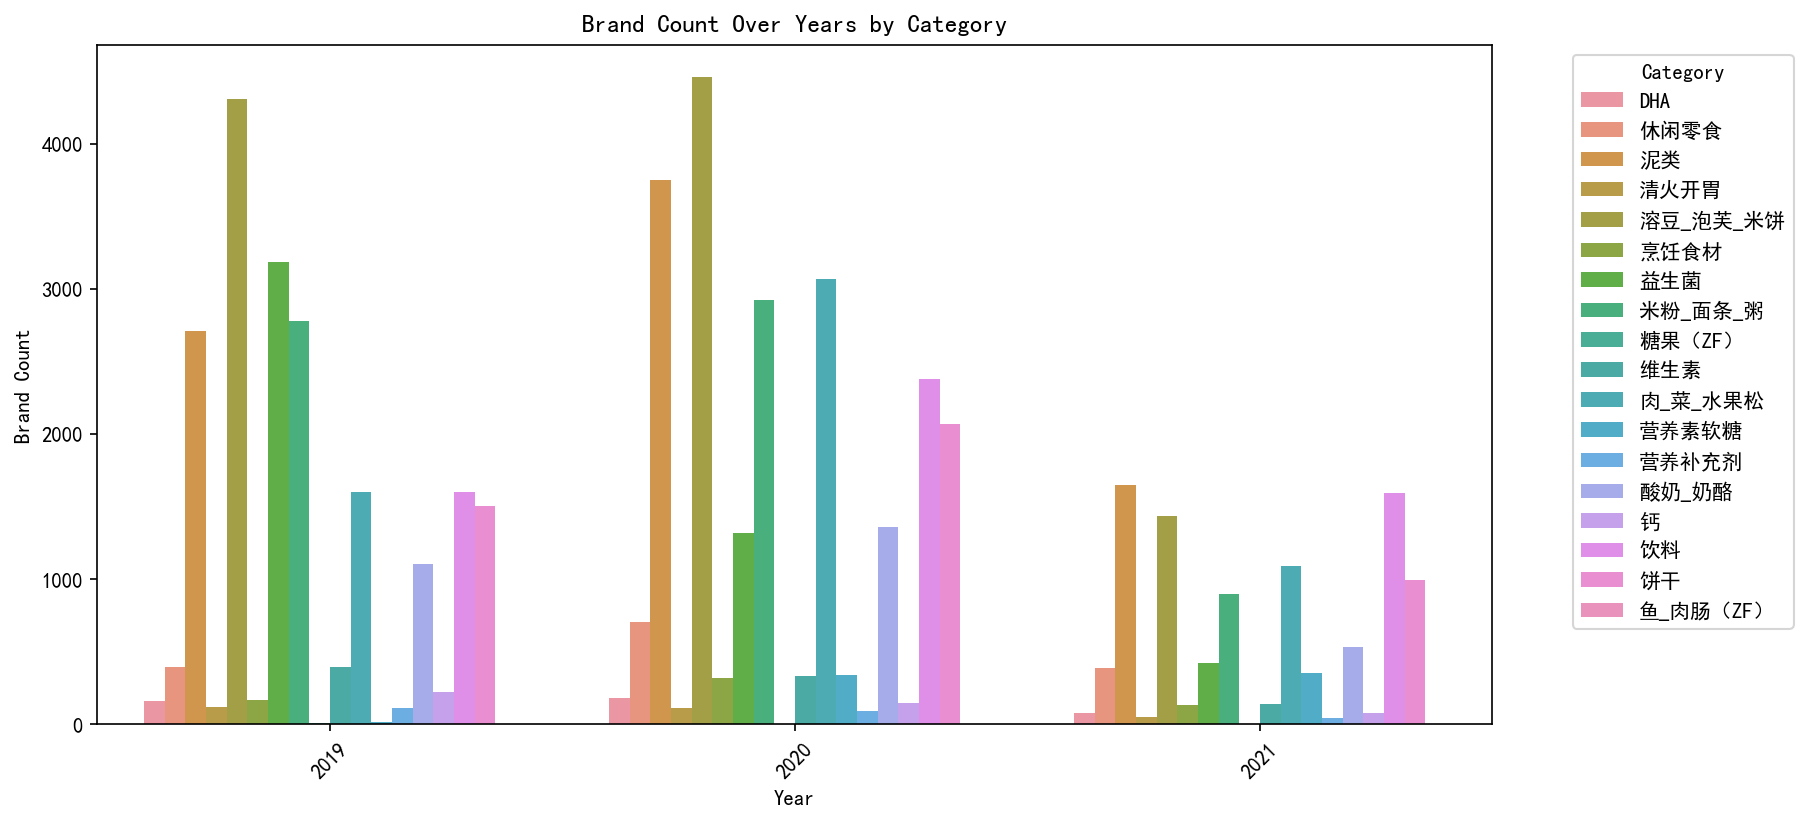

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 使用 seaborn 绘制柱状图
plt.figure(figsize=(12, 6), dpi=150)
sns.barplot(x='year', y='brand_count', hue='category', data=result, ci=None)

plt.xlabel('Year')
plt.ylabel('Brand Count')
plt.title('Brand Count Over Years by Category')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # 调整 legend 的位置
plt.show()

